In [1]:
import pandas as pd
survey_df = pd.read_csv('./Topic_Survey_Assignment.csv', index_col='Unnamed: 0')

In [2]:
survey_df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [3]:
for col in survey_df.columns:
    print(col)

Very interested
Somewhat interested
Not interested


In [4]:
survey_df = survey_df.sort_values(by=['Very interested'], ascending=False)

In [5]:
survey_df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
cols = list(survey_df.columns)
cols

['Very interested', 'Somewhat interested', 'Not interested']

In [8]:
survey_df[cols] = survey_df[cols].div(survey_df[cols].sum(axis=1), axis=0).multiply(100)

In [9]:
survey_df.round(decimals=2)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


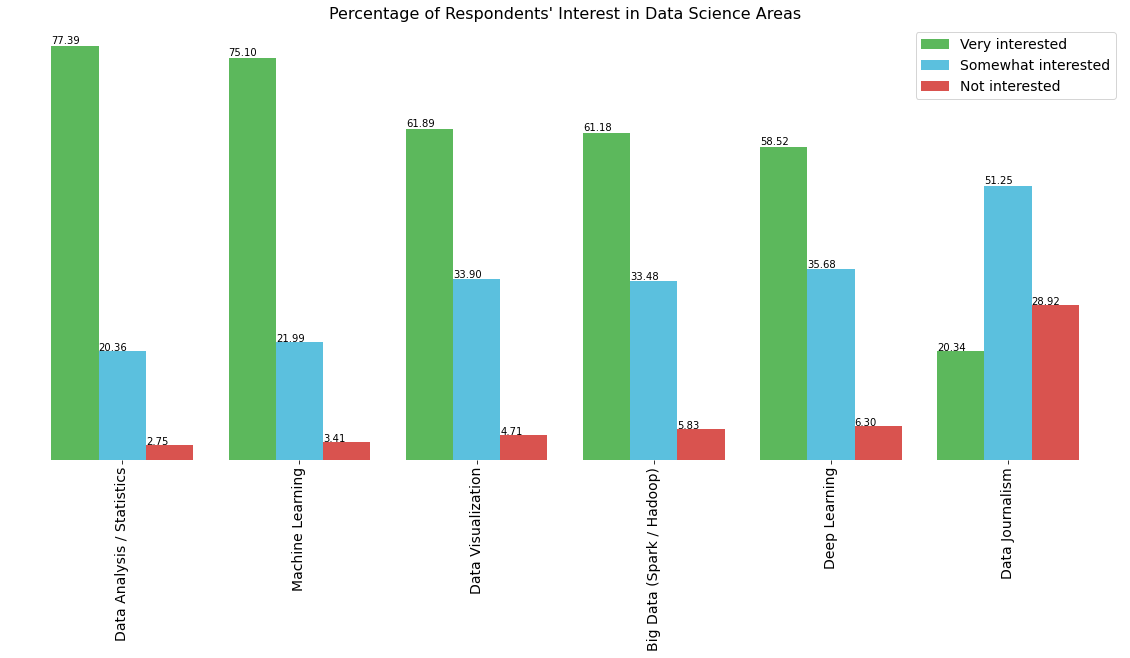

In [10]:
my_colors=('#5cb85c', '#5bc0de', '#d9534f')
title_size = 16
other_size = 14
width = 0.35  # the width of the bars

ax = survey_df.plot(kind='bar', 
                    figsize = (20, 8), 
                    width = 0.8, 
                    color = my_colors,
                    fontsize = 14)

plt.yticks([])
plt.box(on=None)
plt.legend(fontsize=14)
plt.title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
for p in ax.patches:
    ax.annotate('{0:.2f}'.format(p.get_height()*1.005), (p.get_x(), p.get_height()*1.005))
plt.show()

In [11]:
df_crime_sf = pd.read_csv('./SF_Incidents_2016_.csv')

In [12]:
df_new = df_crime_sf.groupby(['PdDistrict']).count().reset_index()

In [13]:
df_new.drop(['Category','Descript','DayOfWeek','Date','Time', 'Resolution','Address','X','Y','Location','PdId'], axis=1, inplace=True)

In [14]:
df_new.rename(columns={'PdDistrict':'Neighbourhood', 'IncidntNum':'Count'}, inplace=True)

In [15]:
df_new

,Neighbourhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [16]:
sf_geo = r'./san-francisco.geojson'

In [19]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



In [32]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [33]:
# create a plain SF map
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

In [34]:
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_new,
    columns=['Neighbourhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crimes'
)

# display map
sf_map

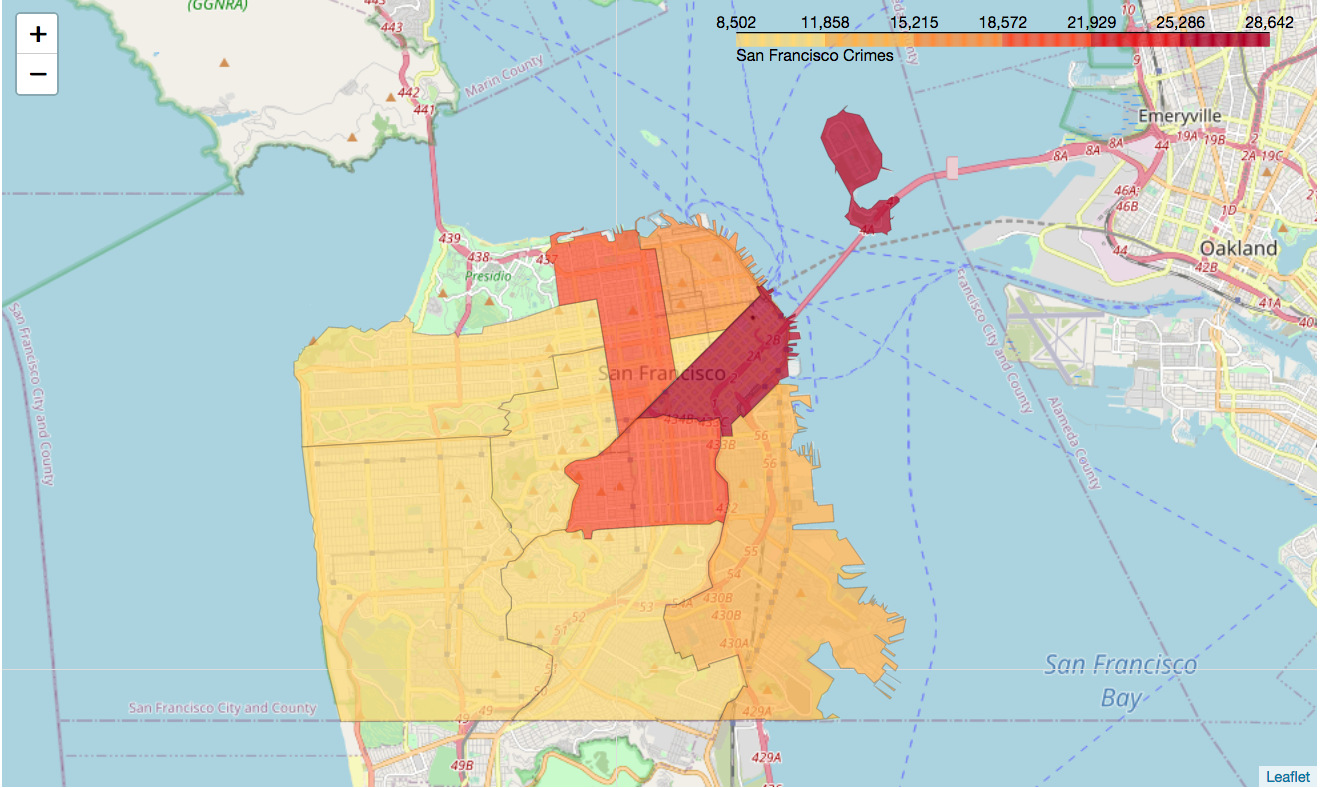

In [2]:
from IPython.display import Image
PATH1 = '/Users/u4307082/Desktop/coursera_data_science/data_viz/'
Image(PATH1 + 'choropeth_map.png', width=1000, height=1000)